# <center>Laboratorium Całki<br>Metody Numeryczne</center>

# Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [9]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg


**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\sin^2(\cfrac{1}{x-1.01})dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=1$ przy pomocy następujących metod:  
    1. Metoda Prostokątów
    2. Metoda Trapezów - [trapezoid](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid)
    3. Metoda Kwadratur - [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)
    2. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

***Komentarz do rozwiązania zadań:***

W celu znalezienia odpowiedzi na pytanie o możliwość całkowania funkcji na dowolnym przedziale utworzyłam wykresy funkcji na różnych przedziałach. 

Do obliczenia całki na zadanym przedziale należało skorzystać m.in. z Metody Prostokątów oraz Metody Trapezów. W tych metodach analizowany przedział dzielony jest na *n* równych części. Im większa wartość *n*, tym mniejsza wartość *dx*, stanowiąca odległość między kolejnymi analizowanymi punktami. Wzrost *n* powoduje także zwiększenie wartości długości wektora *y*. Sposób obliczania całki jako pola pod wykresem przedstawiłam na wykresach dla różnych wartości *n*.

Funkcje *quad* oraz *quadrature* korzystają z Metody Kwadratur. Obliczone wartości nie zależą od wartości *dx*, ponieważ do ich użycia wystarczy jedynie znajomość wartości z końców przedziału.



18.3 µs ± 4.45 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
17.2 µs ± 2.59 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
35.5 µs ± 3.32 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
68.7 µs ± 4.15 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
28.6 µs ± 4.19 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
27.9 µs ± 2.72 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
28.8 µs ± 3.24 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
35.9 µs ± 4.82 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.27 ms ± 29.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:276: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.037836e-03
  warnings.warn(


2.08 ms ± 593 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.3664441581185955e-09
0.009037835872024003


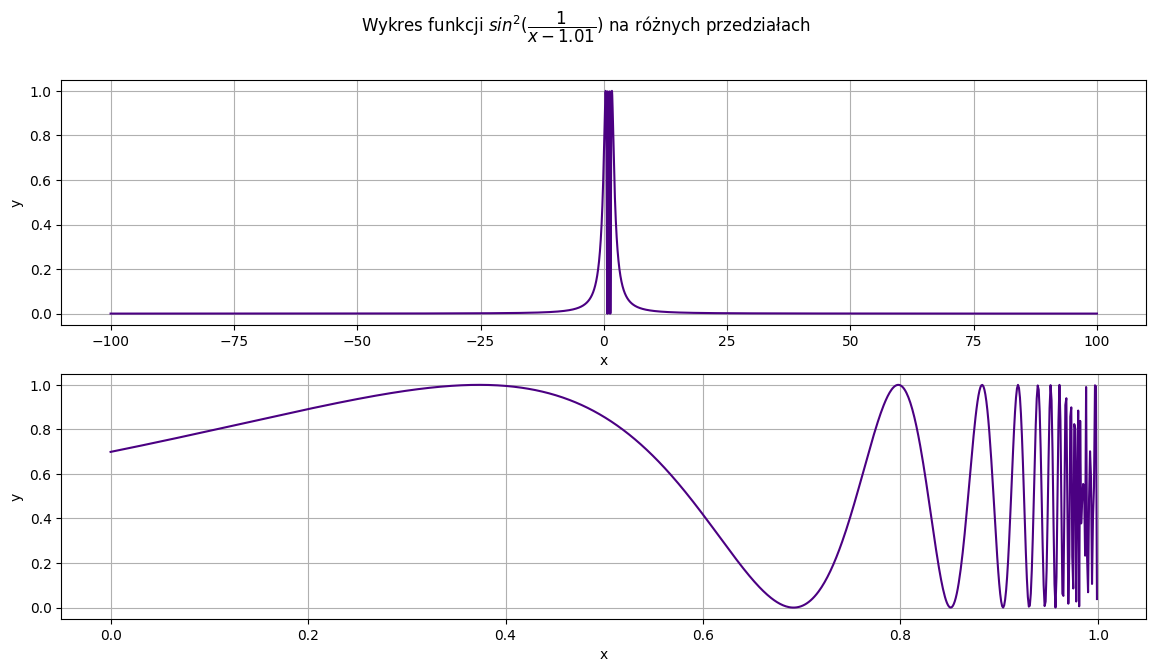

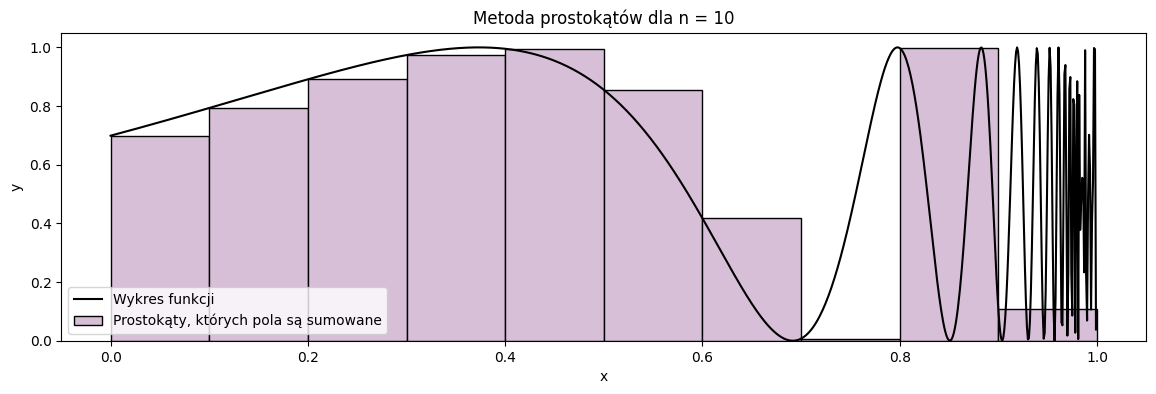

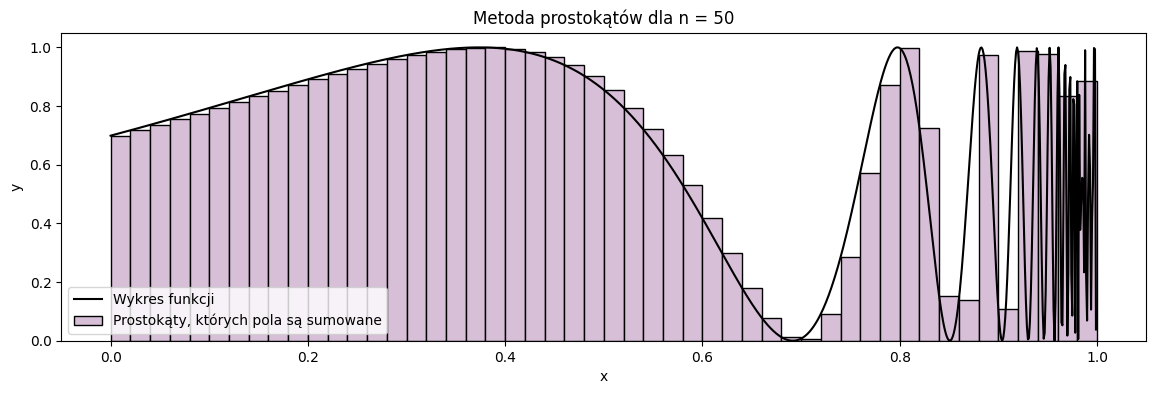

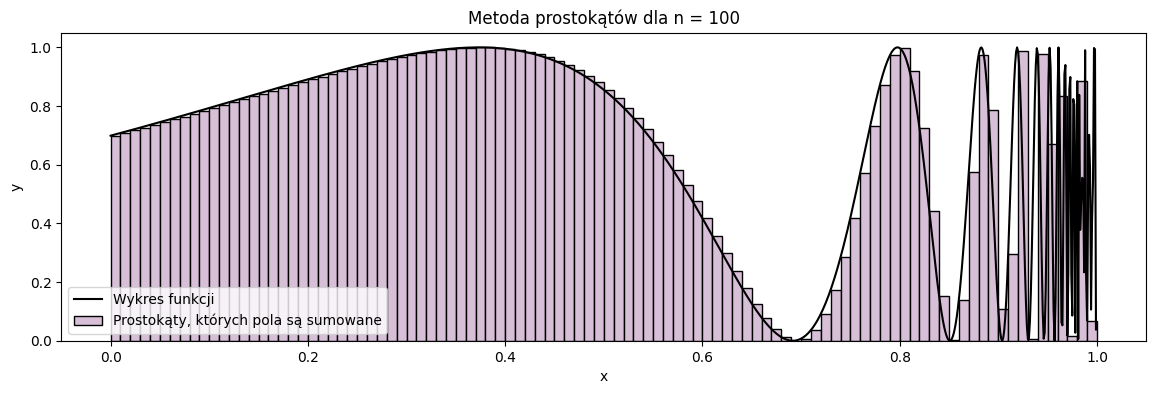

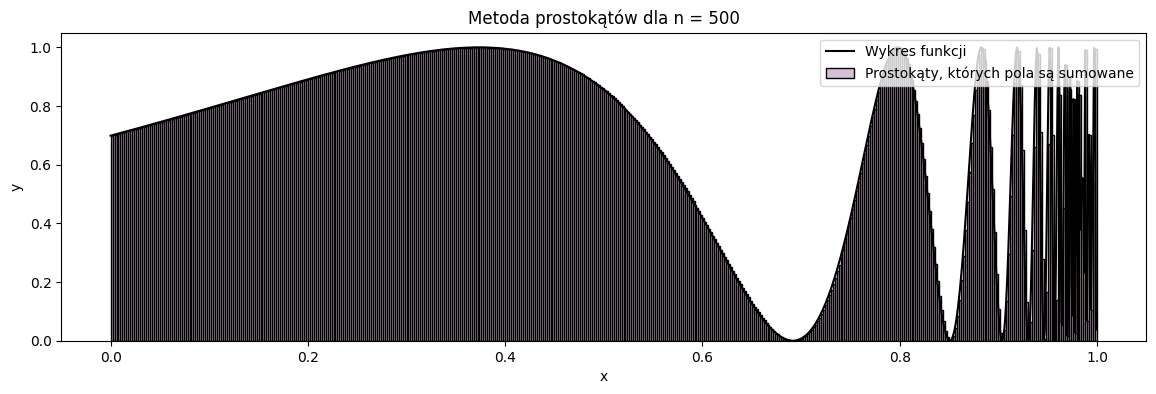

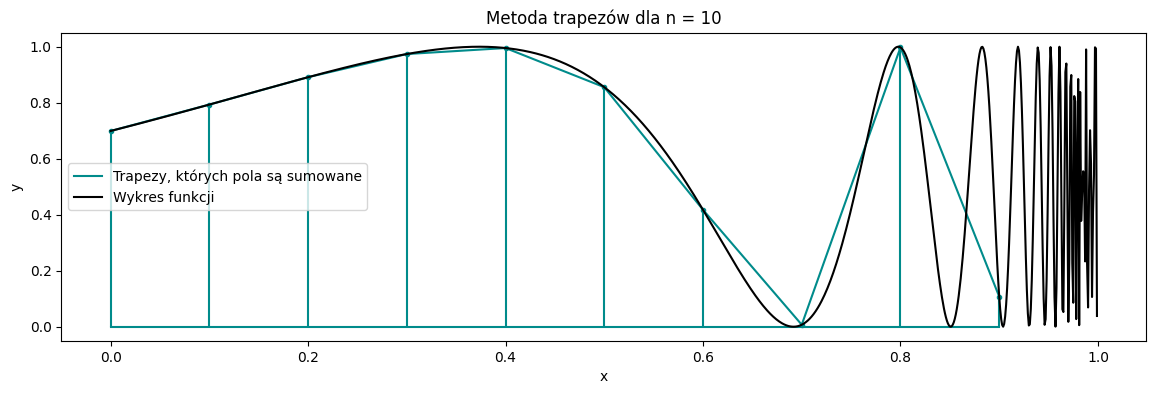

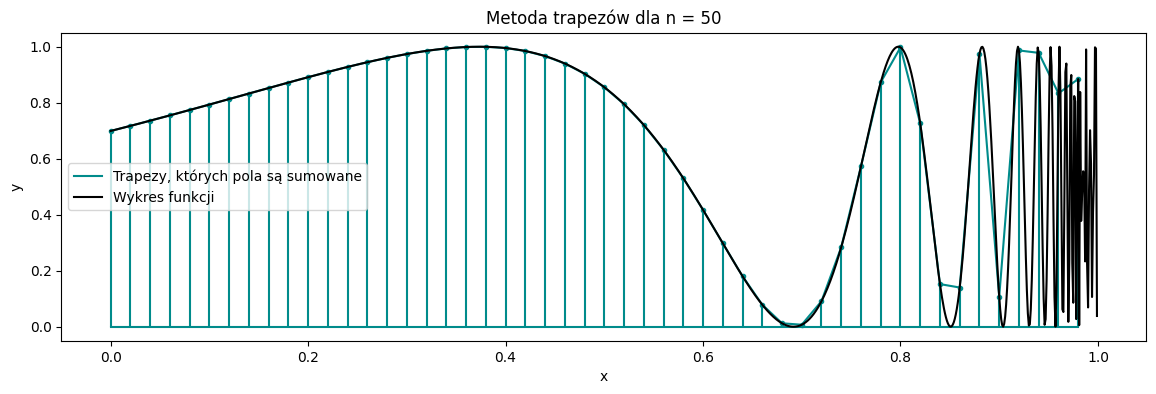

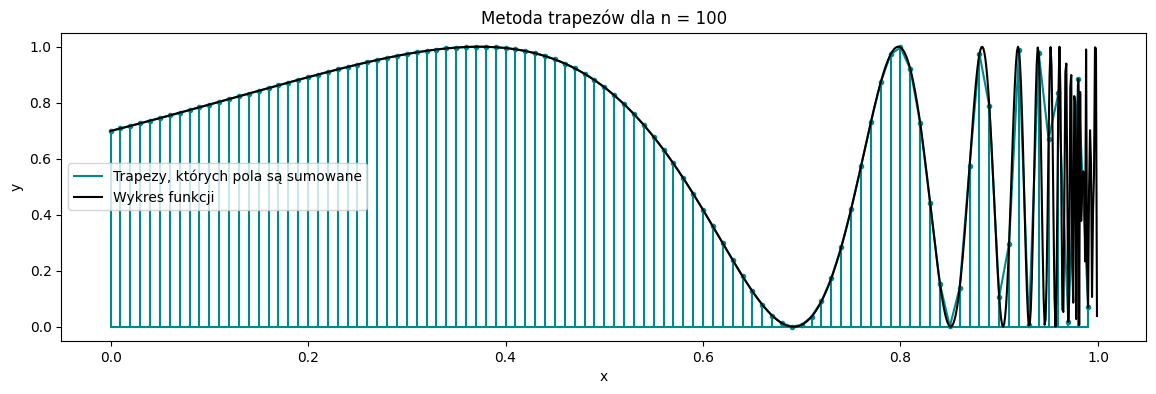

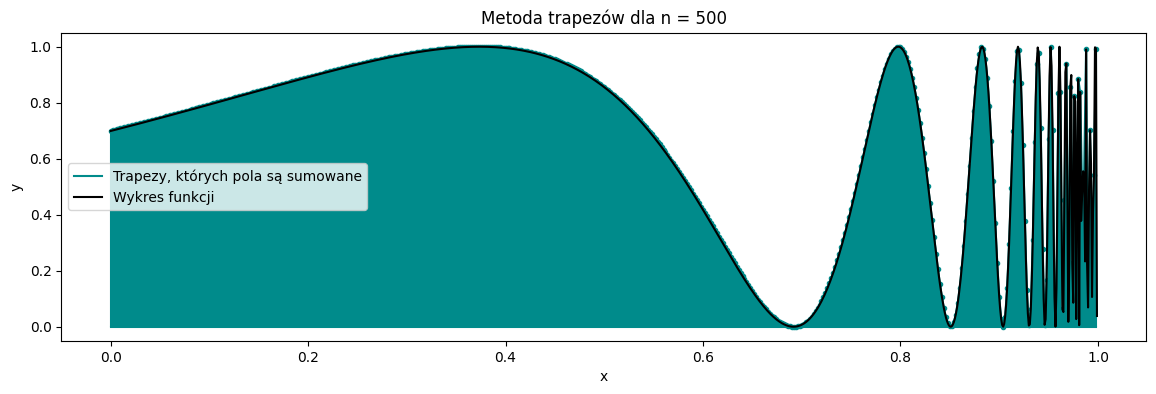

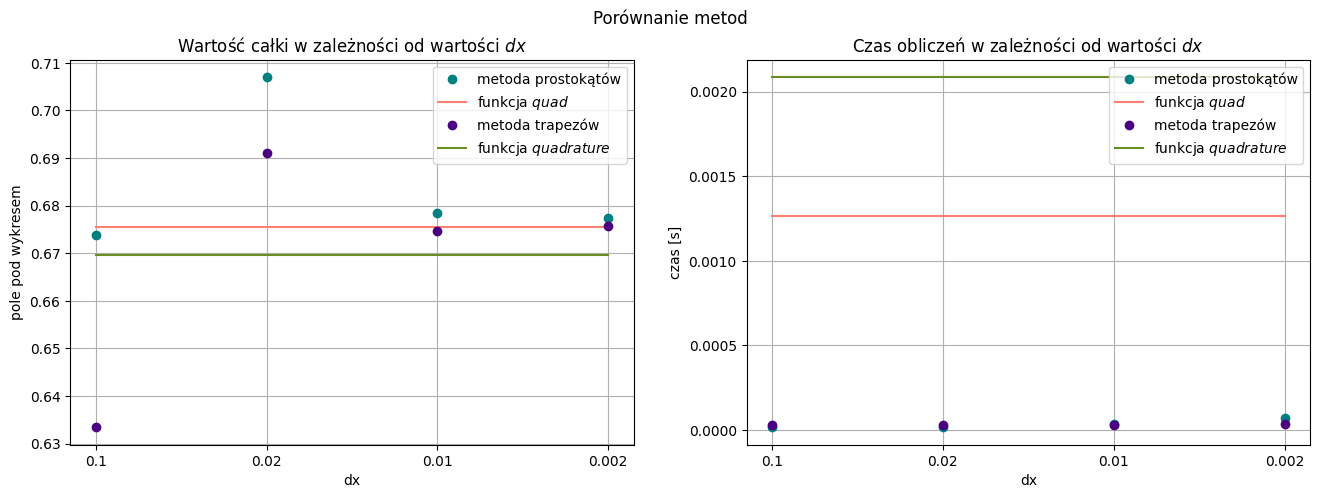

In [10]:
f = lambda x: np.sin(1/(x-1.01))**2
a = -100
b = 100
x = np.arange(a, b, 0.01)
_, (ax1, ax2) = plt.subplots(2, 1, figsize= (14, 7))
ax1.plot(x, f(x), color = 'indigo')
ax1.grid()
ax1.set(xlabel= 'x', ylabel= 'y')

a = 0
b = 1
n_list = [10, 50, 100, 500]
x = np.arange(a, b, 0.001)
ax2.plot(x, f(x), color= 'indigo')
ax2.grid()
ax2.set(xlabel= 'x', ylabel= 'y')

plt.suptitle('Wykres funkcji $sin^2(\dfrac{1}{x-1.01})$ na różnych przedziałach')

# metoda prostokątów
y_len_list_pros = []
dx_list_pros = []
times_pros = []
calki_pros = []

def kwadraty(n : int, a : float, b : float):
    dx = (b-a)/n
    if dx not in dx_list_pros:
        dx_list_pros.append(dx)
    x = np.arange(a, b, dx)
    y = f(x)
    if len(y) not in y_len_list_pros:
         y_len_list_pros.append(len(y))
    calka = dx*sum(y)
    if calka not in calki_pros:
        calki_pros.append(calka)
    return x, y, dx
    
for n in n_list:
    time_pros = %timeit -r 5 -n 10 -o kwadraty(n, a, b)
    times_pros.append(time_pros.average)  
    x, y, dx = kwadraty(n, a, b)
    _, ax = plt.subplots(figsize = (14, 4))
    ax.bar(x + dx/2, y, dx, edgecolor= 'black', color = 'thistle',  label= 'Prostokąty, których pola są sumowane')
    ax.plot(np.arange(a, b, 0.001), f(np.arange(a, b, 0.001)), color = 'black', label= 'Wykres funkcji')
    ax.set(xlabel= 'x', ylabel= 'y', title= 'Metoda prostokątów dla n = {0}'.format(str(n)))
    ax.legend()

# metoda trapezów

y_len_list_trap = []
dx_list_trap = []
times_trap = []
calki_trap = []

def trapezy(n : int, a : float, b : float):
    dx = (b-a)/n
    if dx not in dx_list_trap:
        dx_list_trap.append(dx)
    x = np.arange(a, b, dx)
    y = f(x)
    if len(y) not in y_len_list_trap:
        y_len_list_trap.append(len(y))
    calka = sp.integrate.trapezoid(y, x, dx)
    if calka not in calki_trap:
        calki_trap.append(calka)
    return x, y, dx
    
for n in n_list:
    time_trap = %timeit -r 5 -n 10 -o trapezy(n, a, b)
    times_trap.append(time_trap.average)  
    x, y, dx = trapezy(n, a, b)
    _, ax = plt.subplots(figsize = (14, 4))
    ax.stem(x, y, markerfmt= '.',  basefmt = 'darkcyan', linefmt='darkcyan')
    ax.plot(x, y, color='darkcyan', label= 'Trapezy, których pola są sumowane')
    ax.plot(np.arange(a, b, 0.001), f(np.arange(a, b, 0.001)), color = 'black', label= 'Wykres funkcji')
    ax.set(xlabel= 'x', ylabel= 'y', title= 'Metoda trapezów dla n = {0}'.format(str(n)))
    ax.legend()

# funkcje: quad, quadrature

calka_quad, abs_err_quad = sp.integrate.quad(f, a, b)
time = %timeit -r 5 -n 10 -o sp.integrate.quad(f, a, b)
time_quad = time.average

calka_quadrat, abs_err_quadrat = sp.integrate.quadrature(f, a, b)
time = %timeit -r 5 -n 10 -o sp.integrate.quad(f, a, b)
time_quadrat = time.average

# porównanie
_, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5))
labels = [str(el) for el in dx_list_pros]
ax1.plot(labels, calki_pros, 'o', label= 'metoda prostokątów', color = 'teal')
ax1.plot(labels, [calka_quad for el in range(len(labels))], label = 'funkcja $quad$', color = 'salmon')
ax1.plot(labels, calki_trap,'o', label= 'metoda trapezów', color = 'indigo' )
ax1.plot(labels, [calka_quadrat for el in range(len(labels))], label= 'funkcja $quadrature$', color= 'olivedrab')
ax1.grid()
ax1.legend()
ax1.set(xlabel= 'dx', ylabel= 'pole pod wykresem', title= 'Wartość całki w zależności od wartości $dx$')

labels = [str(el) for el in dx_list_pros]
ax2.plot(labels, times_pros, 'o', label= 'metoda prostokątów', color = 'teal')
ax2.plot(labels, [time_quad for el in range(len(labels))], label = 'funkcja $quad$', color = 'salmon')
ax2.plot(labels, times_trap,'o', label= 'metoda trapezów', color = 'indigo' )
ax2.plot(labels, [time_quadrat for el in range(len(labels))], label= 'funkcja $quadrature$', color= 'olivedrab')
ax2.grid()
ax2.legend()
ax2.set(xlabel= 'dx', ylabel='czas [s]', title= 'Czas obliczeń w zależności od wartości $dx$' )

plt.suptitle('Porównanie metod')
print(abs_err_quad)
print(abs_err_quadrat)


***Wnioski:***

Funkcja z zadania pierwszego jest ciągła w całej swojej dziedzinie, którą stanowi zbiór liczb rzeczywistych, zatem wartość całki możemy liczyć na dowolnym przedziale. 

Wykresy porównujące wyniki w zależności od metody pokazują, że im mniejsza wartość *dx* (czyli także im większa długość wektora *y*), tym dokładniejsze wyniki otrzymane za pomocą Metody Prostokątów oraz Trapezów. Funkcje *quad* oraz *quadrature* zależą jedynie od wartości *a* oraz *b*, dlatego ich wykresy przedstawione zostały w postaci funkcji stałych. Oprócz wartości całki, funkcje te zwracają także wartości błędu bezwzględnego. Dokładniejsza okazała się funkcja *quad*.

Metody Prostokątów i Trapezów okazały się znacznie szybsze.

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{-x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

12.2 µs ± 3.83 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
12.8 µs ± 2.65 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
23.5 µs ± 3.11 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
73.1 µs ± 1.69 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
22.5 µs ± 2.84 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
82.8 µs ± 8.98 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
65.2 µs ± 10.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
48.9 µs ± 4.09 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
90.6 µs ± 4.66 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
87.4 µs ± 3.47 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
8.291413475940725e-15
6.123907048127819e-09


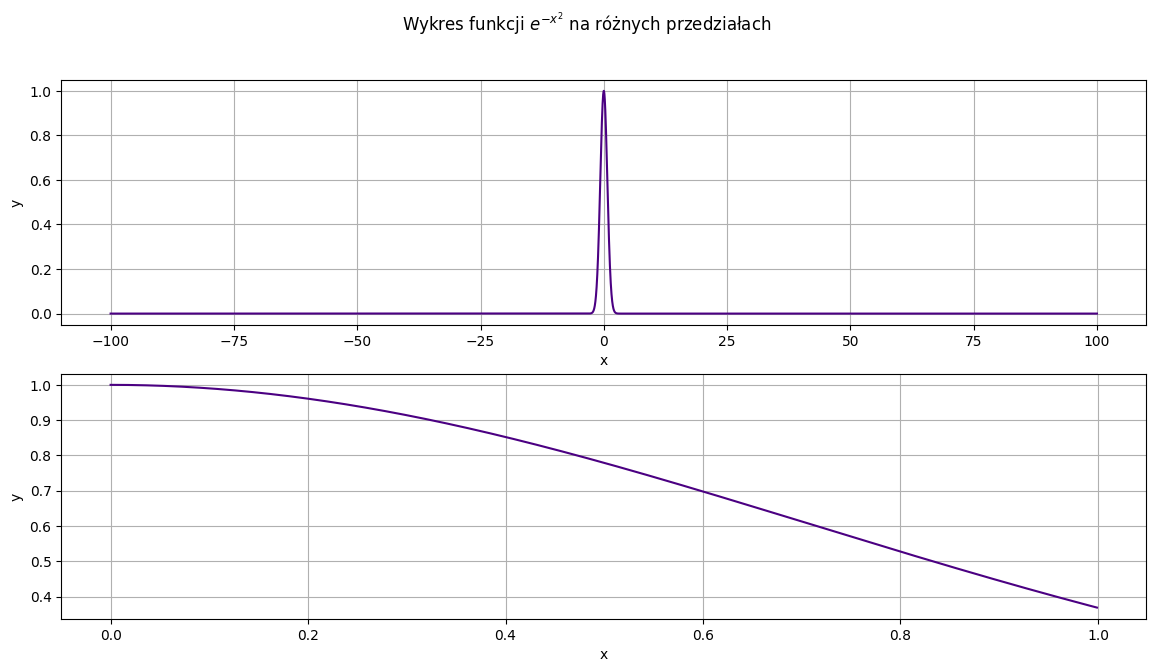

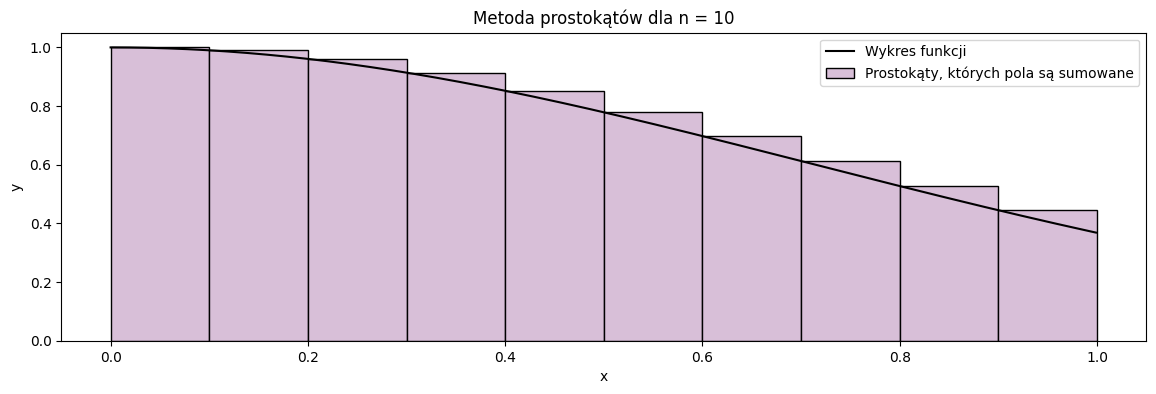

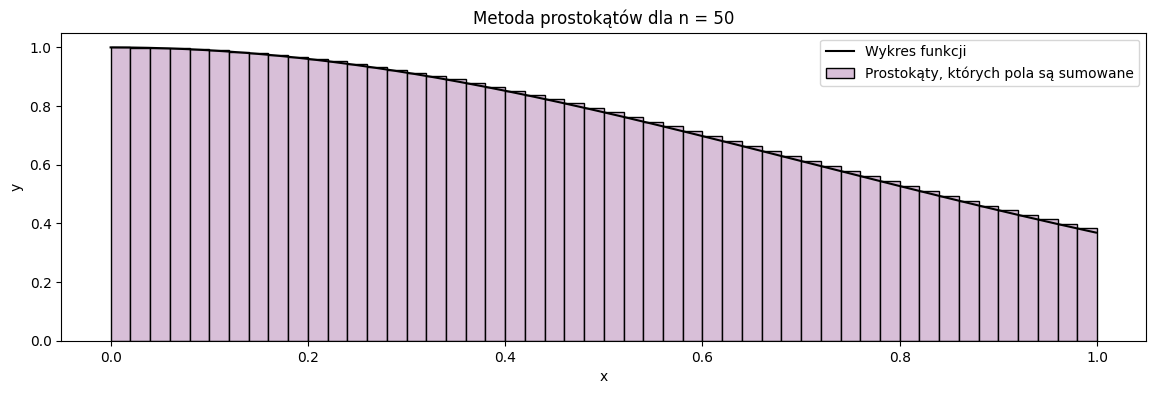

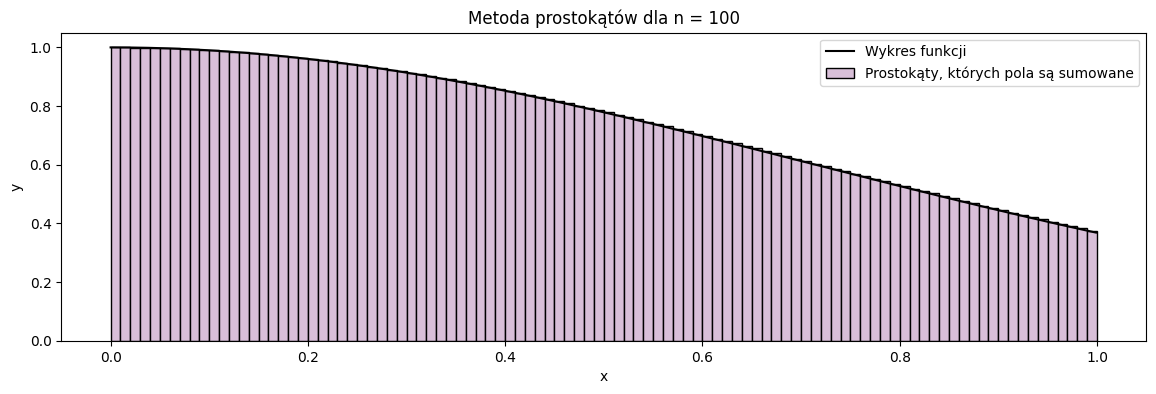

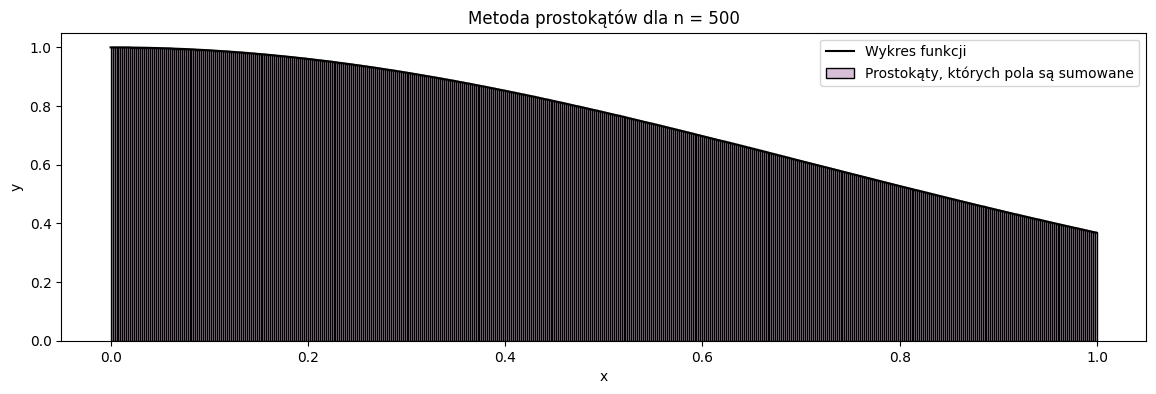

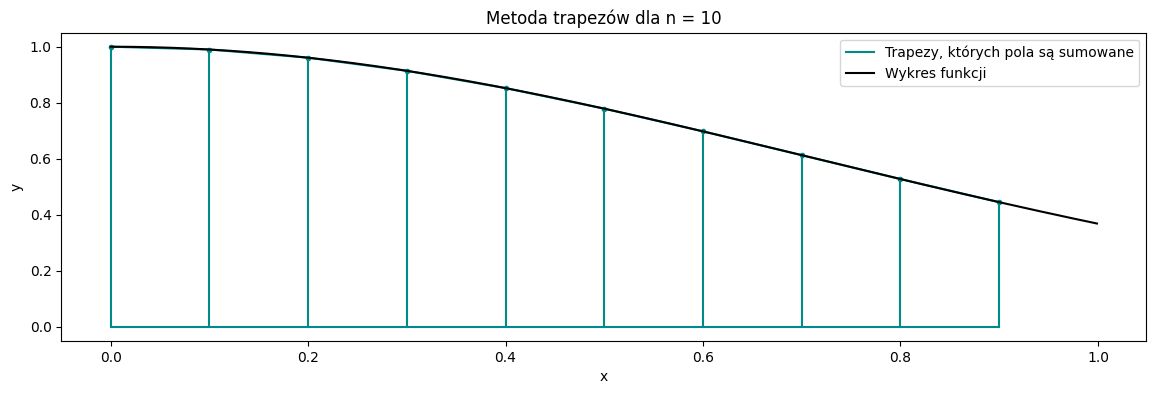

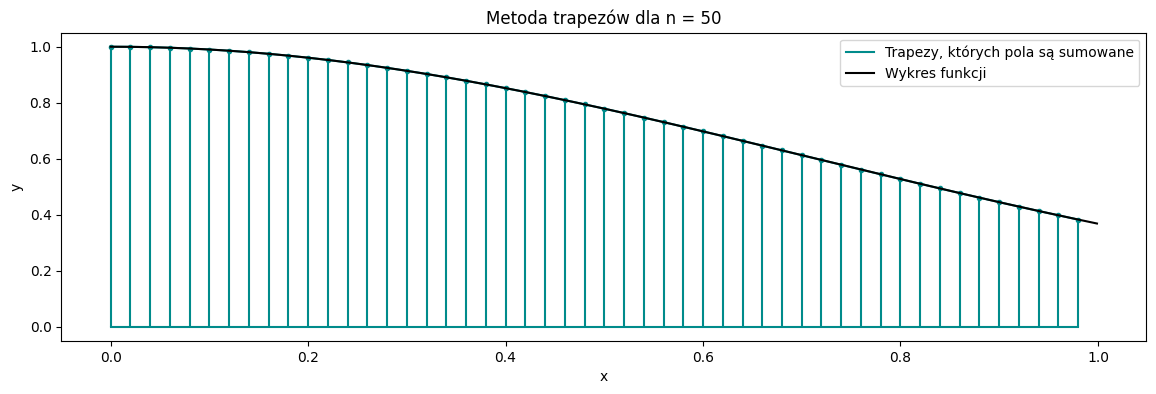

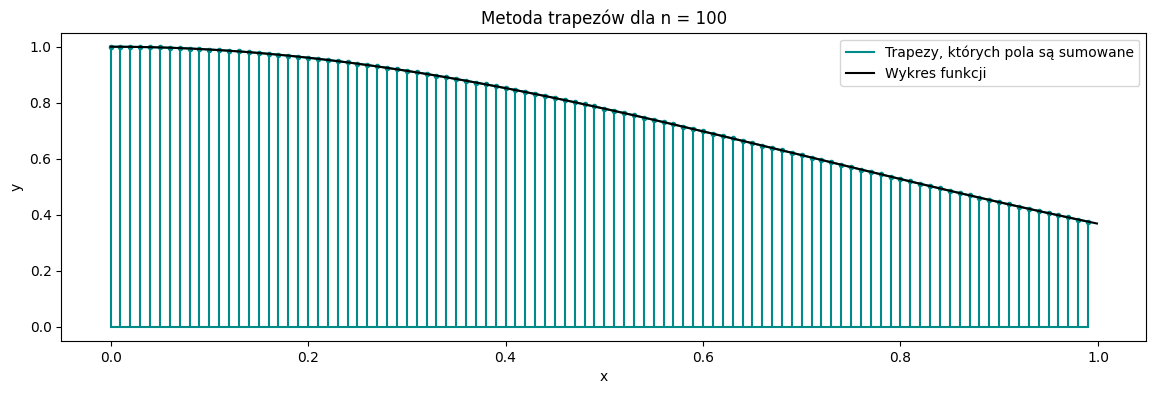

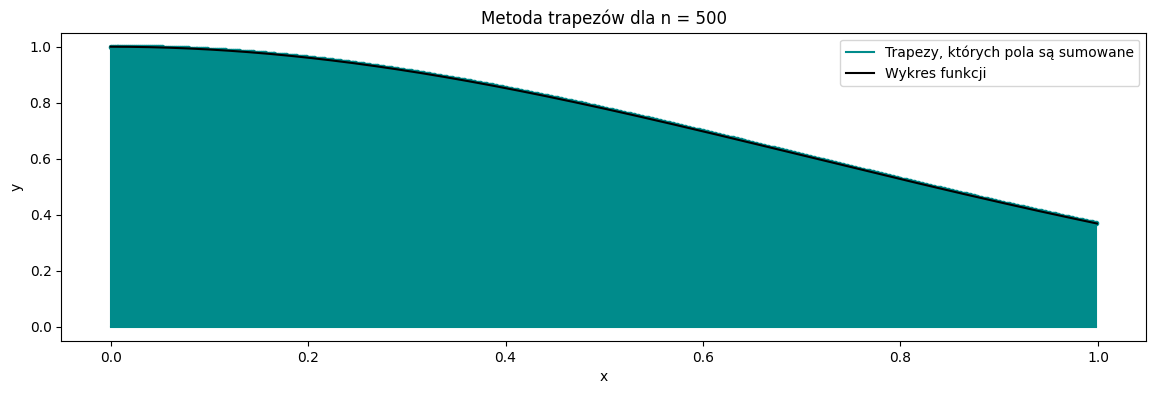

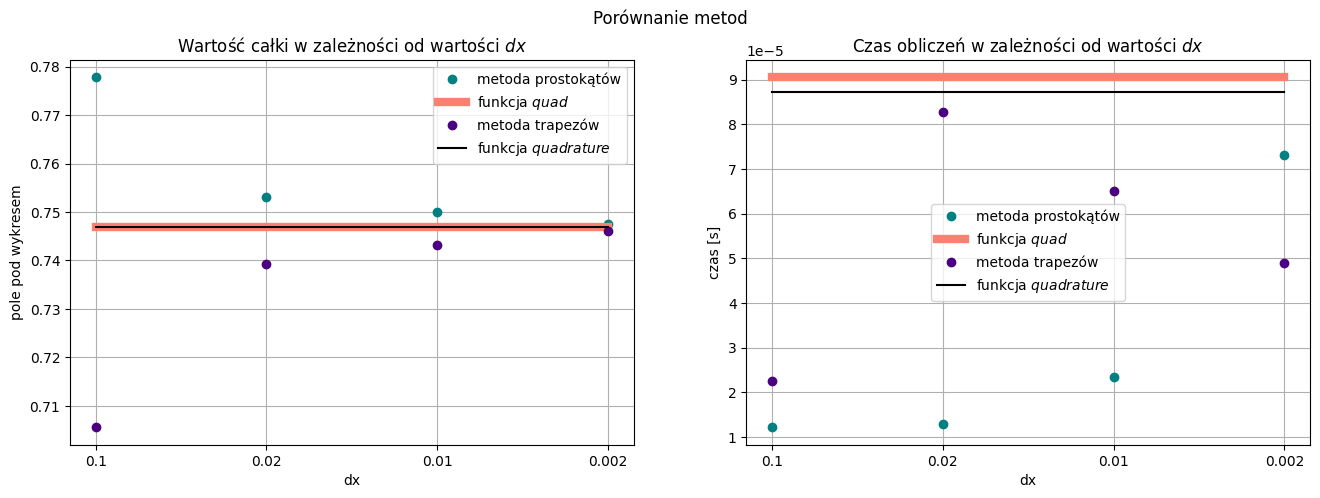

In [11]:
f = lambda x: np.exp(-x**2)
a = -100
b = 100
x = np.arange(a, b, 0.01)
_, (ax1, ax2) = plt.subplots(2, 1, figsize= (14, 7))
ax1.plot(x, f(x), color = 'indigo')
ax1.grid()
ax1.set(xlabel= 'x', ylabel= 'y')

a = 0
b = 1
x = np.arange(a, b, 0.001)
ax2.plot(x, f(x), color= 'indigo')
ax2.grid()
ax2.set(xlabel= 'x', ylabel= 'y')

plt.suptitle('Wykres funkcji $e^{-x^2}$ na różnych przedziałach')

# metoda prostokątów

y_len_list_pros = []
dx_list_pros = []
times_pros = []
calki_pros = []

def kwadraty(n : int, a : float, b : float):
    dx = (b-a)/n
    if dx not in dx_list_pros:
        dx_list_pros.append(dx)
    x = np.arange(a, b, dx)
    y = f(x)
    if len(y) not in y_len_list_pros:
         y_len_list_pros.append(len(y))
    calka = dx*sum(y)
    if calka not in calki_pros:
        calki_pros.append(calka)
    return x, y, dx
    
for n in n_list:
    time_pros = %timeit -r 5 -n 10 -o kwadraty(n, a, b)
    times_pros.append(time_pros.average)  
    x, y, dx = kwadraty(n, a, b)
    _, ax = plt.subplots(figsize = (14, 4))
    ax.bar(x + dx/2, y, dx, edgecolor= 'black', color = 'thistle',  label= 'Prostokąty, których pola są sumowane')
    ax.plot(np.arange(a, b, 0.001), f(np.arange(a, b, 0.001)), color = 'black', label= 'Wykres funkcji')
    ax.set(xlabel= 'x', ylabel= 'y', title= 'Metoda prostokątów dla n = {0}'.format(str(n)))
    ax.legend()

# metoda trapezów

y_len_list_trap = []
dx_list_trap = []
times_trap = []
calki_trap = []

def trapezy(n : int, a : float, b : float):
    dx = (b-a)/n
    if dx not in dx_list_trap:
        dx_list_trap.append(dx)
    x = np.arange(a, b, dx)
    y = f(x)
    if len(y) not in y_len_list_trap:
        y_len_list_trap.append(len(y))
    calka = sp.integrate.trapezoid(y, x, dx)
    if calka not in calki_trap:
        calki_trap.append(calka)
    return x, y, dx
    
for n in n_list:
    time_trap = %timeit -r 5 -n 10 -o trapezy(n, a, b)
    times_trap.append(time_trap.average)  
    x, y, dx = trapezy(n, a, b)
    _, ax = plt.subplots(figsize = (14, 4))
    ax.stem(x, y, markerfmt= '.',  basefmt = 'darkcyan', linefmt='darkcyan')
    ax.plot(x, y, color='darkcyan', label= 'Trapezy, których pola są sumowane')
    ax.plot(np.arange(a, b, 0.001), f(np.arange(a, b, 0.001)), color = 'black', label= 'Wykres funkcji')
    ax.set(xlabel= 'x', ylabel= 'y', title= 'Metoda trapezów dla n = {0}'.format(str(n)))
    ax.legend()

# funkcje: quad, quadrature

calka_quad, abs_err_quad = sp.integrate.quad(f, a, b)
time = %timeit -r 5 -n 10 -o sp.integrate.quad(f, a, b)
time_quad = time.average

calka_quadrat, abs_err_quadrat = sp.integrate.quadrature(f, a, b)
time = %timeit -r 5 -n 10 -o sp.integrate.quad(f, a, b)
time_quadrat = time.average

# porównanie
_, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5))
labels = [str(el) for el in dx_list_pros]
ax1.plot(labels, calki_pros, 'o', label= 'metoda prostokątów', color = 'teal')
ax1.plot(labels, [calka_quad for el in range(len(labels))], label = 'funkcja $quad$', color = 'salmon',  linewidth= 6)
ax1.plot(labels, calki_trap,'o', label= 'metoda trapezów', color = 'indigo' )
ax1.plot(labels, [calka_quadrat for el in range(len(labels))], label= 'funkcja $quadrature$', color= 'black')
ax1.grid()
ax1.legend()
ax1.set(xlabel= 'dx', ylabel= 'pole pod wykresem', title= 'Wartość całki w zależności od wartości $dx$')

labels = [str(el) for el in dx_list_pros]
ax2.plot(labels, times_pros, 'o', label= 'metoda prostokątów', color = 'teal')
ax2.plot(labels, [time_quad for el in range(len(labels))], label = 'funkcja $quad$', color = 'salmon', linewidth= 6)
ax2.plot(labels, times_trap,'o', label= 'metoda trapezów', color = 'indigo' )
ax2.plot(labels, [time_quadrat for el in range(len(labels))], label= 'funkcja $quadrature$', color= 'black')
ax2.grid()
ax2.legend()
ax2.set(xlabel= 'dx', ylabel='czas [s]', title= 'Czas obliczeń w zależności od wartości $dx$' )

plt.suptitle('Porównanie metod')
print(abs_err_quad)
print(abs_err_quadrat)


***Wnioski:***

Całkowanie funkcji z zadania drugiego także jest możliwe na dowolnym przedziale.

Wyniki uzyskane za pomocą Metody Prostokątów oraz Trapezów również okazały się bardziej zbliżone do wyników uzyskanych za pomocą funkcji *quad* oraz *quadrature* dla mniejszych wartości *dx*. Funkcja *quad* po raz kolejny dała dokładniejsze wyniki w stosunku do funkcji *quadrature*. Błąd bezwzględny obliczonej całki to wielkość rzędu ${10}^{-15}$.

Wyznaczenie całki w przypadku drugiego zadania wymagało mniej czasu na obliczenia, niż w pierwszym.

***Zadanie 3.***  
Dla funkcji 

$$f(x) = x^{x}$$

wyznacz numerycznie wartośc całki na przedziale $a = 1$, $b=2$  w  taki sam sposób jak w zadaniu 1.

C:\Users\Pc\AppData\Local\Temp\ipykernel_2648\3289008441.py:1: RuntimeWarning: invalid value encountered in power
  f = lambda x: x**x


17.2 µs ± 2.33 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
10.9 µs ± 892 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
22.2 µs ± 1.98 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
72.6 µs ± 1.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
22.8 µs ± 4.27 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
29.5 µs ± 3.66 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
33.2 µs ± 5.82 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
37.7 µs ± 3.01 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.61 µs ± 583 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.45 µs ± 416 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.2764526203364124e-14
2.317523062345117e-09


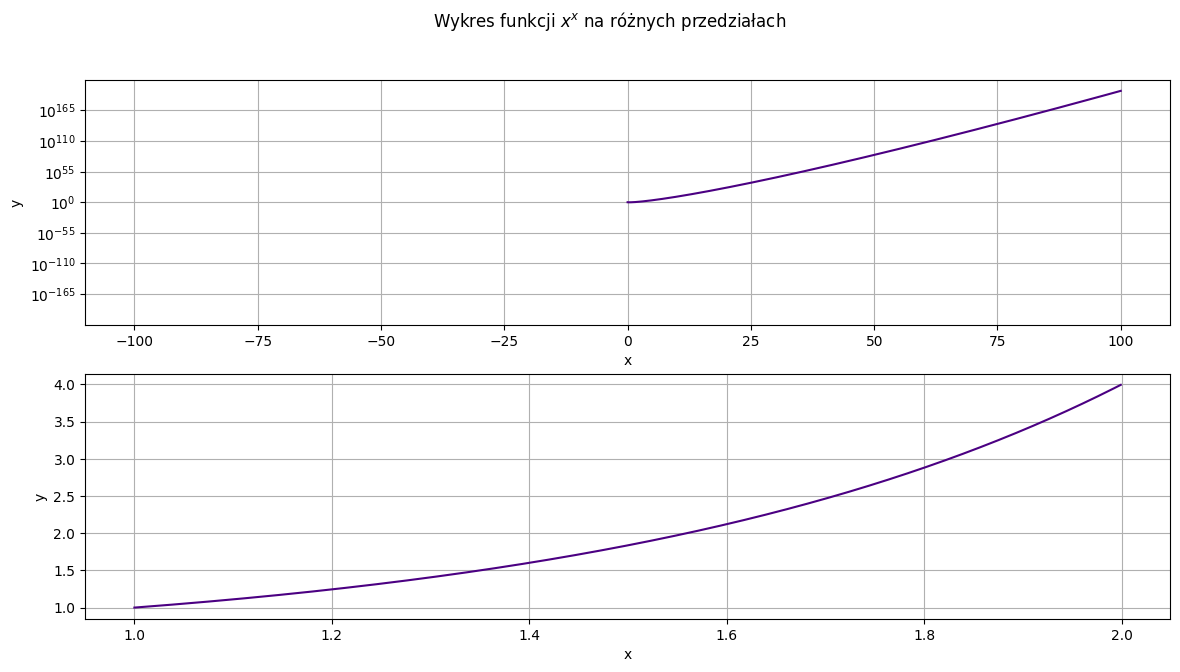

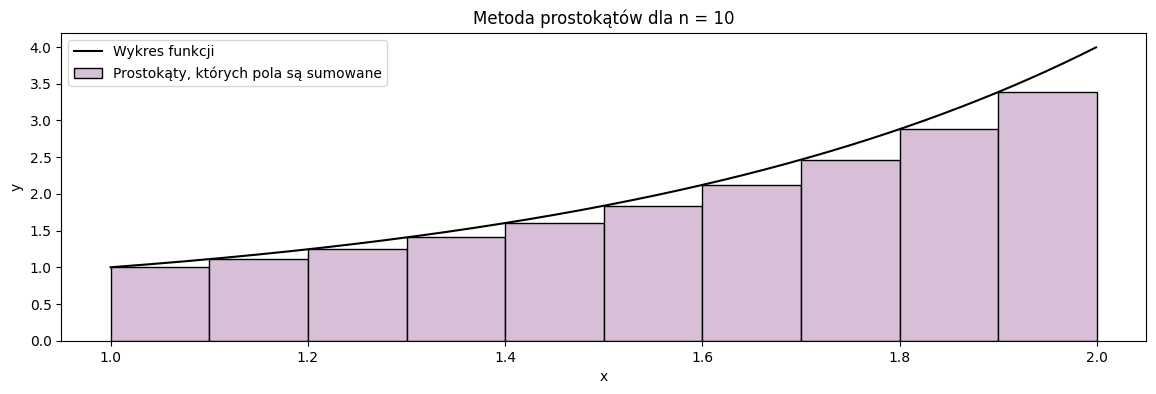

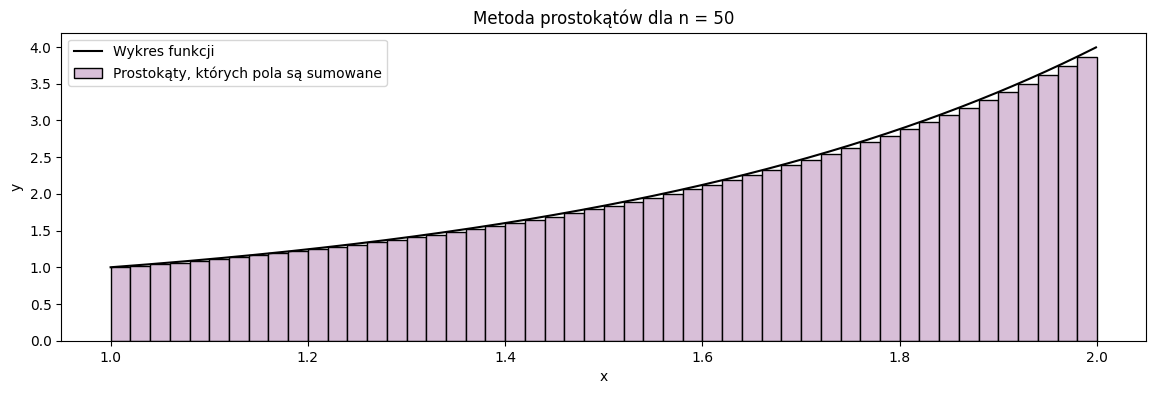

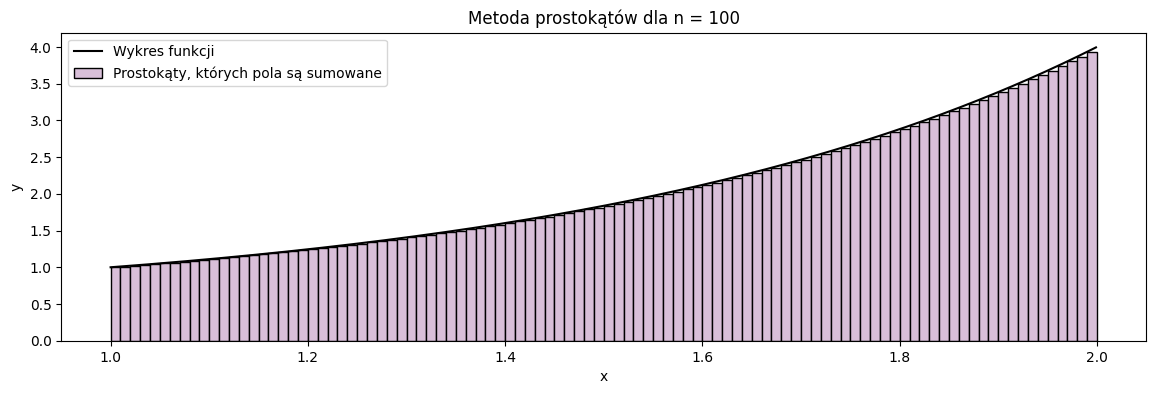

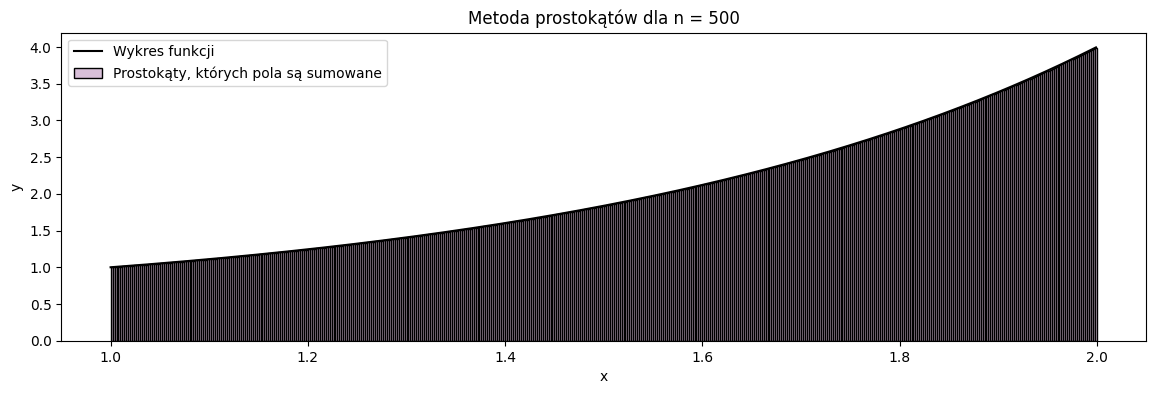

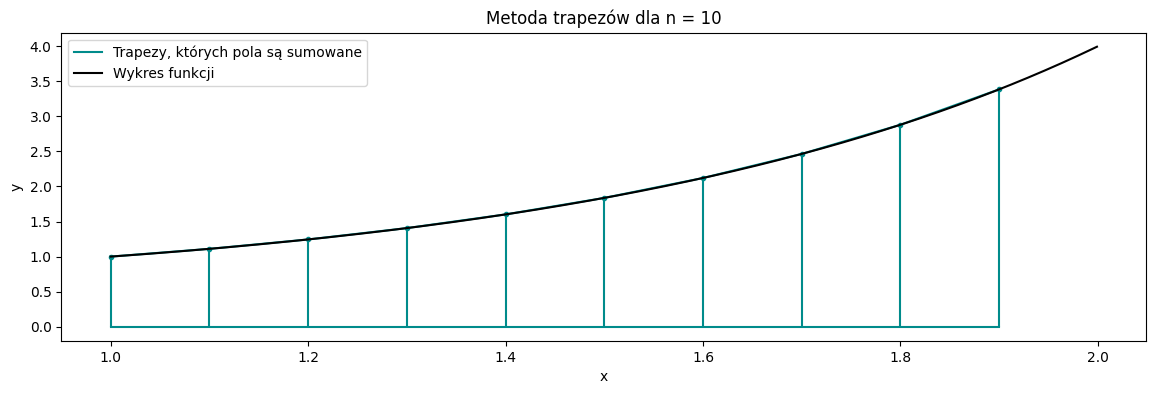

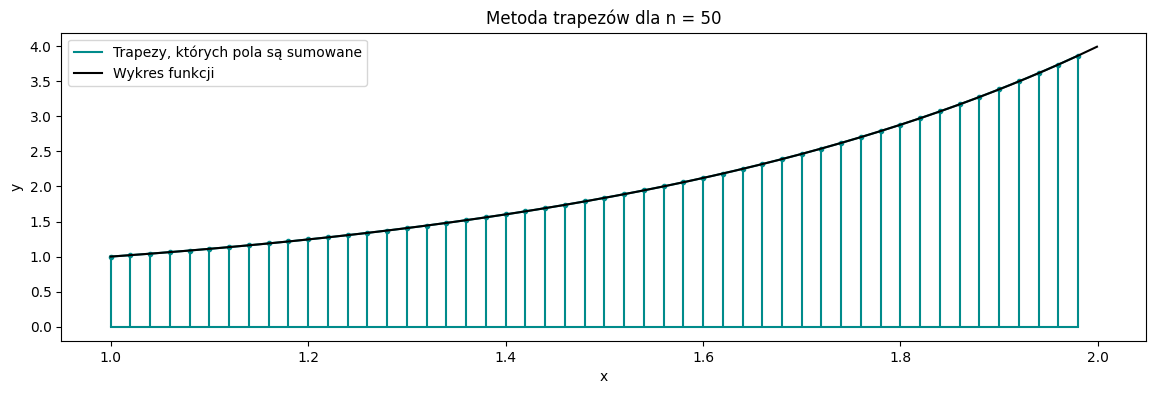

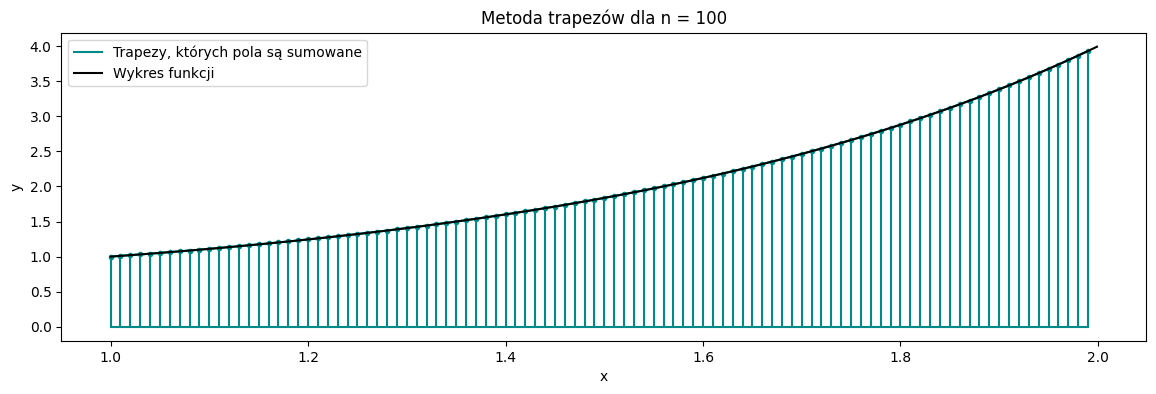

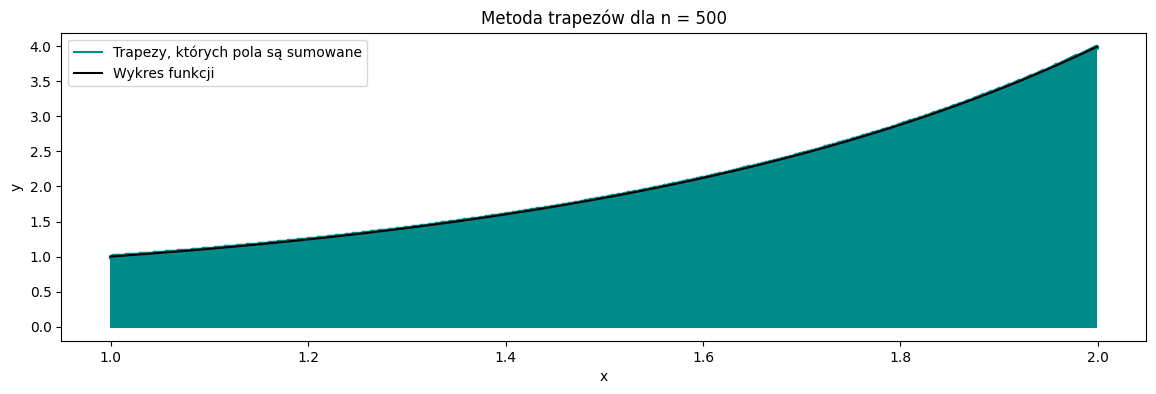

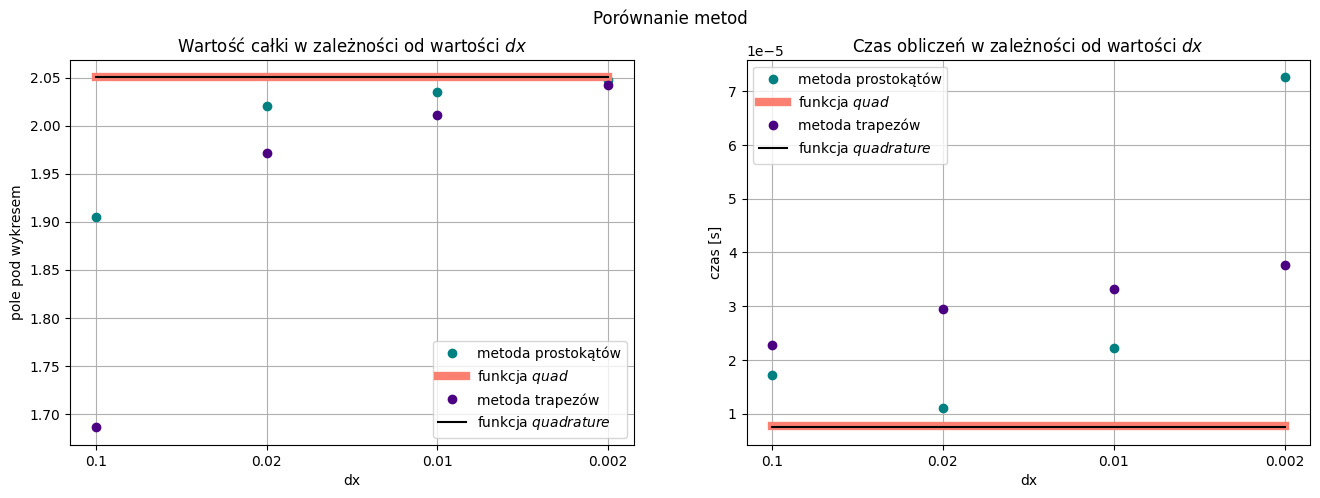

In [12]:
f = lambda x: x**x
a = -100
b = 100
x = np.arange(a, b, 0.01)
_, (ax1, ax2) = plt.subplots(2, 1, figsize= (14, 7))
ax1.plot(x, f(x), color = 'indigo')
ax1.grid()
ax1.semilogy()
ax1.set(xlabel= 'x', ylabel= 'y')

a = 1
b = 2
x = np.arange(a, b, 0.001)
ax2.plot(x, f(x), color= 'indigo')
ax2.grid()
ax2.set(xlabel= 'x', ylabel= 'y')

plt.suptitle('Wykres funkcji $x^{x}$ na różnych przedziałach')

# metoda prostokątów

y_len_list_pros = []
dx_list_pros = []
times_pros = []
calki_pros = []

def kwadraty(n : int, a : float, b : float):
    dx = (b-a)/n
    if dx not in dx_list_pros:
        dx_list_pros.append(dx)
    x = np.arange(a, b, dx)
    y = f(x)
    if len(y) not in y_len_list_pros:
         y_len_list_pros.append(len(y))
    calka = dx*sum(y)
    if calka not in calki_pros:
        calki_pros.append(calka)
    return x, y, dx
    
for n in n_list:
    time_pros = %timeit -r 5 -n 10 -o kwadraty(n, a, b)
    times_pros.append(time_pros.average)  
    x, y, dx = kwadraty(n, a, b)
    _, ax = plt.subplots(figsize = (14, 4))
    ax.bar(x + dx/2, y, dx, edgecolor= 'black', color = 'thistle',  label= 'Prostokąty, których pola są sumowane')
    ax.plot(np.arange(a, b, 0.001), f(np.arange(a, b, 0.001)), color = 'black', label= 'Wykres funkcji')
    ax.set(xlabel= 'x', ylabel= 'y', title= 'Metoda prostokątów dla n = {0}'.format(str(n)))
    ax.legend()

# metoda trapezów

y_len_list_trap = []
dx_list_trap = []
times_trap = []
calki_trap = []

def trapezy(n : int, a : float, b : float):
    dx = (b-a)/n
    if dx not in dx_list_trap:
        dx_list_trap.append(dx)
    x = np.arange(a, b, dx)
    y = f(x)
    if len(y) not in y_len_list_trap:
        y_len_list_trap.append(len(y))
    calka = sp.integrate.trapezoid(y, x, dx)
    if calka not in calki_trap:
        calki_trap.append(calka)
    return x, y, dx
    
for n in n_list:
    time_trap = %timeit -r 5 -n 10 -o trapezy(n, a, b)
    times_trap.append(time_trap.average)  
    x, y, dx = trapezy(n, a, b)
    _, ax = plt.subplots(figsize = (14, 4))
    ax.stem(x, y, markerfmt= '.',  basefmt = 'darkcyan', linefmt='darkcyan')
    ax.plot(x, y, color='darkcyan', label= 'Trapezy, których pola są sumowane')
    ax.plot(np.arange(a, b, 0.001), f(np.arange(a, b, 0.001)), color = 'black', label= 'Wykres funkcji')
    ax.set(xlabel= 'x', ylabel= 'y', title= 'Metoda trapezów dla n = {0}'.format(str(n)))
    ax.legend()

# funkcje: quad, quadrature

calka_quad, abs_err_quad = sp.integrate.quad(f, a, b)
time = %timeit -r 5 -n 10 -o sp.integrate.quad(f, a, b)
time_quad = time.average

calka_quadrat, abs_err_quadrat = sp.integrate.quadrature(f, a, b)
time = %timeit -r 5 -n 10 -o sp.integrate.quad(f, a, b)
time_quadrat = time.average

# porównanie
_, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5))
labels = [str(el) for el in dx_list_pros]
ax1.plot(labels, calki_pros, 'o', label= 'metoda prostokątów', color = 'teal')
ax1.plot(labels, [calka_quad for el in range(len(labels))], label = 'funkcja $quad$', color = 'salmon', linewidth= 6)
ax1.plot(labels, calki_trap,'o', label= 'metoda trapezów', color = 'indigo' )
ax1.plot(labels, [calka_quadrat for el in range(len(labels))], label= 'funkcja $quadrature$', color= 'black')
ax1.grid()
ax1.legend()
ax1.set(xlabel= 'dx', ylabel= 'pole pod wykresem', title= 'Wartość całki w zależności od wartości $dx$')

labels = [str(el) for el in dx_list_pros]
ax2.plot(labels, times_pros, 'o', label= 'metoda prostokątów', color = 'teal')
ax2.plot(labels, [time_quad for el in range(len(labels))], label = 'funkcja $quad$', color = 'salmon', linewidth= 6)
ax2.plot(labels, times_trap, 'o', label= 'metoda trapezów', color = 'indigo' )
ax2.plot(labels, [time_quadrat for el in range(len(labels))], label= 'funkcja $quadrature$', color= 'black')
ax2.grid()
ax2.legend()
ax2.set(xlabel= 'dx', ylabel='czas [s]', title= 'Czas obliczeń w zależności od wartości $dx$' )

plt.suptitle('Porównanie metod')
print(abs_err_quad)
print(abs_err_quadrat)

***Wnioski:***

Funkcja z zadania trzeciego nie może być całkowana na dowolnym przedziale, ponieważ jej dziedzina nie zawiera liczb niedodatnich, co widać na wykresach. Na przedziale $[1, 2]$ jest ona ciągła, zatem możemy ją całkować w tym obszarze. 

Funkcje *quad*  i *quadratic* dały równie dokładne wyniki oraz wymagały bardzo zbliżonej ilości czasu na obliczenia. Okazały się także szybsze niż Metoda Kwadratów oraz Metoda Trapezów, których dokładność znacznie wzrosła wraz ze wzrostem liczby elementów wektora *y*.

